<a href="https://colab.research.google.com/github/dan-manolescu/data-structures-fun/blob/main/C5_Tries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tries

In [9]:
from typing import ForwardRef

class TrieNode:
    def __init__(self):
        self.is_entry = False
        self.value = ''
        self.children = {}

    def TrieNodeSearch(self, target: str, index: int) -> ForwardRef('TrieNode'):
        # if the target is located at this level
        # then check if it's a valid entry and return
        if index == len(target):
            if self.is_entry:
                return self
            else:
                return None

        # look for the next character in target
        next_letter = target[index]
        # check if it's present in the childrens and continue
        if next_letter in self.children:
            return self.children[next_letter].TrieNodeSearch(target, index + 1)
        else:
            return None

    def TrieNodeInsert(self, new_value: str, index: int) -> None:
        if index == len(new_value):
            self.is_entry = True
        else:
            next_letter = new_value[index]
            if next_letter not in self.children:
                node = TrieNode()
                node.value = new_value[:index + 1]
                self.children[next_letter] = node
            self.children[next_letter].TrieNodeInsert(new_value, index + 1)

    def TrieNodeDelete(self, target: str, index: int) -> bool:
        if index == len(target):
            if self.is_entry:
                self.is_entry = False
        else:
            next_letter = target[index]
            if next_letter in self.children:
                if self.children[next_letter].TrieNodeDelete(target, index + 1):
                    del self.children[next_letter]

        # do not delete this node if it has either an entry or a child.
        if self.is_entry:
            return False
        if len(self.children) > 0:
            return False
        return True

In [10]:
class Trie:
    def __init__(self):
        self.root = TrieNode()

    def TrieSearch(self, target: str) -> TrieNode:
        return self.root.TrieNodeSearch(target, 0)

    def TrieInsert(self, new_value: str) -> None:
        self.root.TrieNodeInsert(new_value, 0)

    def TrieDelete(self, target: str) -> bool:
        return self.root.TrieNodeDelete(target, 0)

Visualization logic

In [11]:
import graphviz

def visualize_trie(trie: Trie) -> graphviz.Digraph:
    dot = graphviz.Digraph()
    dot.node('')

    def add_nodes_edges(node: TrieNode) -> None:
        entry_attr = {'style': 'filled', 'color':'lightgrey'}
        for letter in sorted(node.children.keys()):
            if node.children[letter].is_entry:
                dot.node(node.children[letter].value, **entry_attr)
            else:
                dot.node(node.children[letter].value)
            dot.edge(node.value, node.children[letter].value, letter)
            add_nodes_edges(node.children[letter])

    add_nodes_edges(trie.root)
    return dot

**Test data**

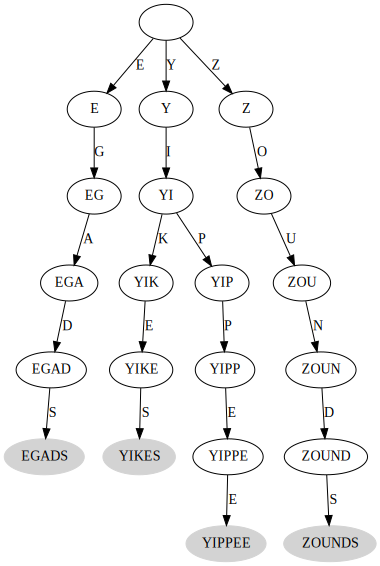

In [12]:
trie = Trie()
trie.TrieInsert('EGADS')
trie.TrieInsert('YIKES')
trie.TrieInsert('YIPPEE')
trie.TrieInsert('ZOUNDS')

visualize_trie(trie)

In [13]:
node = trie.TrieSearch('YIKES')
if node:
    print(node.value)
node = trie.TrieSearch('ZONK')
if not node:
    print('ZONK not found')

YIKES
ZONK not found


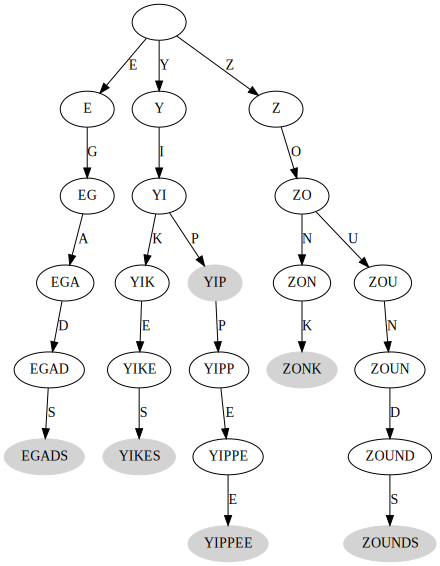

In [14]:
trie.TrieInsert('ZONK')
trie.TrieInsert('YIP')
visualize_trie(trie)

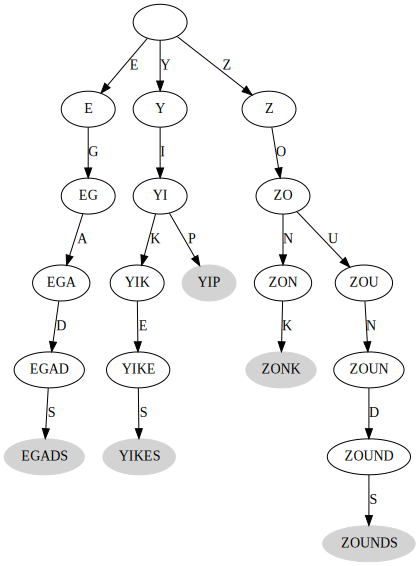

In [15]:
trie.TrieDelete('YIPPEE')
visualize_trie(trie)